In [1]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def politico(nome) : 
    #Definizione ricerca
    dizionario = ['"Changement climatique"' , '"Émissions"' , '"Réchauffement climatique"' ,
    '"Urgence climatique"' ,'"Accords de Paris"' , '"Gaz à effet de serre"' ,'"Accords de Paris"', '"Renouvelables"' , 
    '"Grève climatique"' , '"Gouvernement climatique"']
    claim = nome  + dizionario[0]
    for i in dizionario :
        claim = claim  + ' OR ' + i 
    claim = claim  + ' until:2017-6-11 since:2016-6-11'
    print(claim)

    #ricerca e conto
    scrape = sn.TwitterSearchScraper(claim)
    counter = 0
    for i in scrape.get_items() :
        counter = counter +1
        
    #conto totale    
    claim = nome + ' until:2017-6-11 since:2016-6-11'
    scrape = sn.TwitterSearchScraper(claim)
    counter_tot = 0
    for i in scrape.get_items() :
        counter_tot = counter_tot +1

    if(counter_tot  == 0) : print('Errore')

    return counter/counter_tot , counter_tot , counter

In [4]:
Renaissance = politico('from:Renaissance')
Macron = politico('from:EmmanuelMacron')

from:Renaissance"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11
from:EmmanuelMacron"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11


In [5]:
Ciotti = politico('from:NicolasSarkozy')
Repubblicani = politico('from:lesRepublicains')

from:NicolasSarkozy"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11
from:lesRepublicains"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11


In [6]:
Rassemblement = politico('from:RNational_off')
LePen = politico('from:MLP_officiel')

from:RNational_off"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11
from:MLP_officiel"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11


In [7]:
Melenchon = politico('from:JLMelenchon')
NUPES = politico('from:FranceInsoumise')

from:JLMelenchon"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11
from:FranceInsoumise"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2017-6-11 since:2016-6-11


In [8]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [15]:
#fonte : https://www.ipsos.com/fr-fr/1er-tour-legislatives-2017-sociologie-des-electorats-et-profil-des-abstentionnistes

risultati = [32.2 , 11.03 , 14 , 21.5 ] 
risultati_U24 = [32 , 18 , 14 , 11]
elettori_U24 = 2692374 * 0.37
elettori2534 = 3825849 * 0.35
risultati2534 = [33 , 21 , 13 , 9]
partiti = ['ENS' , 'FI' , 'RN' , 'LR' ]
tweet = [somma(Macron , Renaissance) , somma(NUPES , Melenchon) , somma(LePen , Rassemblement) , somma(Ciotti , Repubblicani) ]
tweet_p = [somma(Macron , Renaissance)[0] , somma(NUPES , Melenchon)[0] , somma(LePen , Rassemblement)[0] , somma(Ciotti , Repubblicani)[0] ]
colori = ['yellow' , 'red' , 'blue' , 'lightblue']

dati = {'Partiti' : partiti , 'Tweet' : tweet , 'Risultati' : risultati , 'Colori' : colori , 'Tweet_p' : tweet_p , 
'Risultati_U25' : risultati_U24 , '25-34' : risultati2534}
Dati = pd.DataFrame(dati)
Dati['Risultati_U35'] = (elettori_U24 * Dati.Risultati_U25 + elettori2534 * Dati['25-34']) / (elettori_U24 + elettori2534)
Dati.Tweet_p = (Dati.Tweet_p*50)
Dati.sort_values(by = 'Tweet_p' , inplace = True , ignore_index = True)
for i in range(len(Dati.Tweet)) :
    Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])

/tmp/ipykernel_14796/4200021465.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])


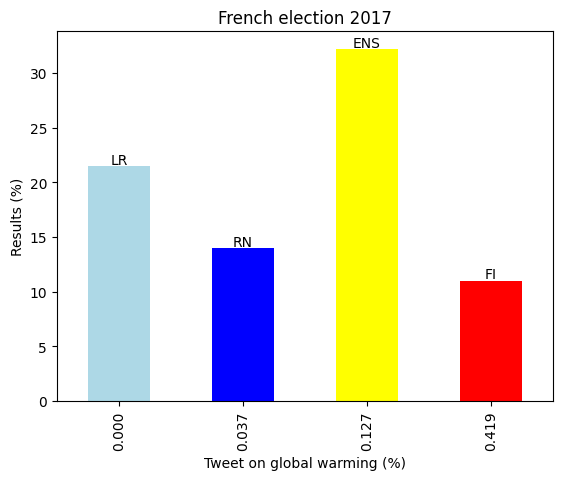

In [16]:
ax = Dati.plot.bar(x = 'Tweet_p' , y = 'Risultati'  , color= Dati['Colori'].array , legend = False , 
xlabel = 'Tweet on global warming (%)' , ylabel = 'Results (%)' , title = "French election 2017")

counter = 0
for patch in ax.patches :
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0] 
    y = patch.get_height() + bl[1] +0.2
    ax.text(x,y,(Dati.Partiti[counter]),
            ha='center', rotation='horizontal')
    counter = counter +1

In [14]:
Dati.to_csv('Elezioni2017.csv' , index=False)